In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#calculation of annual return and annual standard deviation of chosen stock

In [6]:
df=pd.read_csv('JUBLFOOD.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JUBLFOOD,EQ,15-May-17,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,582068509.3,19888,115368,20.01
1,JUBLFOOD,EQ,16-May-17,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,508110696.2,15487,84859,17.41
2,JUBLFOOD,EQ,17-May-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,409472571.4,15205,61936,15.73
3,JUBLFOOD,EQ,18-May-17,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,394324549.9,10345,40599,10.64
4,JUBLFOOD,EQ,19-May-17,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,295117054.1,9834,60049,20.86


In [7]:
df['Series'].value_counts()

EQ    494
BL      1
Name: Series, dtype: int64

In [8]:
df=df[df['Series']!='BL']

In [9]:
returns=df['Close Price'].pct_change()*100

returns.dropna()

annual_mean=returns.mean()*252

annual_std=returns.std()*np.sqrt(252)


In [11]:
# preparing portfolio and calculating annual return and volatility of entire portfolio

tata=pd.read_csv('TATAPOWER.csv')
axis=pd.read_csv('AXISBANK.csv')
ashoka=pd.read_csv('ASHOKA.csv')
fortis=pd.read_csv('FORTIS.csv')
tcs=pd.read_csv('TCS.csv')

ashoka=ashoka.iloc[0:494]
axis=axis.iloc[0:494]
tata=tata.iloc[0:494]
fortis=fortis.iloc[0:494]
tcs=tcs.iloc[0:494]

data=pd.DataFrame({'tata':tata['Close Price'],
                   'axis':axis['Close Price'],
                   'ashoka':ashoka['Close Price'],
                   'fortis':fortis['Close Price'],
                   'tcs':tcs['Close Price']})


returns=data.pct_change()*100
returns=returns.dropna()


In [12]:
w=np.array([[0.2,0.2,0.2,0.2,0.2]]).reshape(-1,1)

ann_mean_return=returns.mean()*252

port_return=w.T@ann_mean_return

port_var=w.T@(returns.cov()@w)


In [13]:
# preparing a scatter plot for differing weights of individaul stocks in portfolio
# mark two portfolios, one with max sharpe ratio and other with lowest volatility 

weights=np.random.random((25000,5))
s=np.sum(weights,axis=1)

r=[]
v=[]
sharpe=[]
for i in range(len(weights)):
    weights[i,:]=weights[i,:]/s[i]
    r.append(weights[i,:].T@ann_mean_return)
    v.append(weights[i,:].T@(returns.cov()@weights[i,:]))
    sharpe.append(r[i]/v[i])

port_data=pd.DataFrame({'w1':weights[:,0],
                        'w2':weights[:,1],
                        'w3':weights[:,2],
                        'w4':weights[:,3],
                        'w5':weights[:,4],
                        'return':r,
                        'risk':v,
                        'sharpe':sharpe})

In [14]:
# portfolio with maximum sharpe ratio

max_sharpe=port_data[port_data['sharpe']==port_data['sharpe'].max()]


In [15]:
# portfolio with lowest volatility

min_vol=port_data[port_data['risk']==port_data['risk'].min()]


Text(0, 0.5, 'Return')

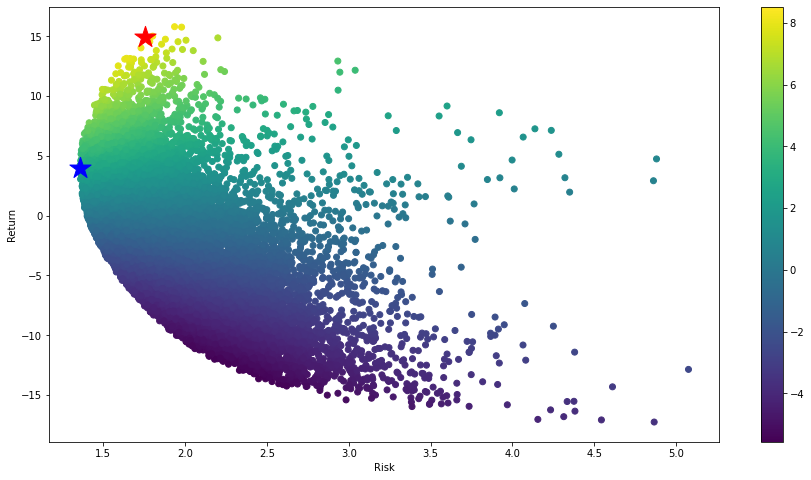

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(port_data['risk'],port_data['return'],c=sharpe)
plt.colorbar()
plt.scatter(max_sharpe['risk'],max_sharpe['return'],c='r',marker='*',s=500)
plt.scatter(min_vol['risk'],min_vol['return'],c='b',marker='*',s=500)
plt.xlabel('Risk')
plt.ylabel('Return')
